In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv("/customer_behavior.csv")
df.head()
df.info()
df.isnull().sum()
# Ensure PurchaseAmount is numeric
df["PurchaseAmount"] = pd.to_numeric(df["PurchaseAmount"], errors="coerce")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       5000 non-null   int64  
 1   Gender           4903 non-null   object 
 2   Region           4825 non-null   object 
 3   PurchaseAmount   4850 non-null   float64
 4   ProductCategory  4474 non-null   object 
 5   Churn            4735 non-null   object 
 6   CampaignGroup    4815 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB


In [2]:
#Question 1: Mean, Median, Mode
mean_val = df["PurchaseAmount"].mean()
median_val = df["PurchaseAmount"].median()
mode_val = df["PurchaseAmount"].mode()[0]

print("Mean:", mean_val)
print("Median:", median_val)
print("Mode:", mode_val)


Mean: 1003.9506701030928
Median: 998.0799999999999
Mode: 0.0


Number of outliers: 15


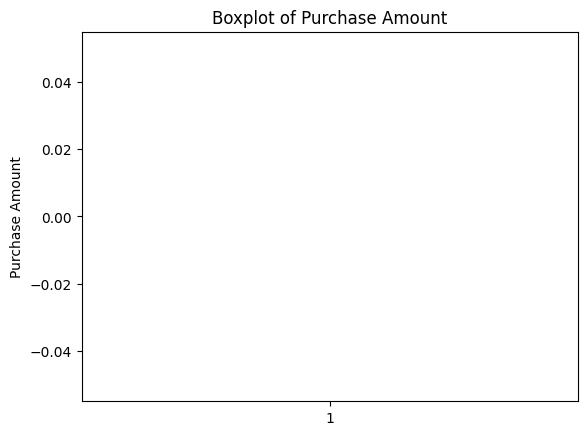

In [5]:
#Question 2: Outlier Detection (IQR Method)
Q1 = df["PurchaseAmount"].quantile(0.25)
Q3 = df["PurchaseAmount"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["PurchaseAmount"] < Q1 - 1.5 * IQR) |
              (df["PurchaseAmount"] > Q3 + 1.5 * IQR)]

print("Number of outliers:", len(outliers))

#Boxplot
plt.boxplot(df["PurchaseAmount"])
plt.title("Boxplot of Purchase Amount")
plt.ylabel("Purchase Amount")
plt.show()



Skewness: 0.10609189374631554
Kurtosis: -0.2615105545319705


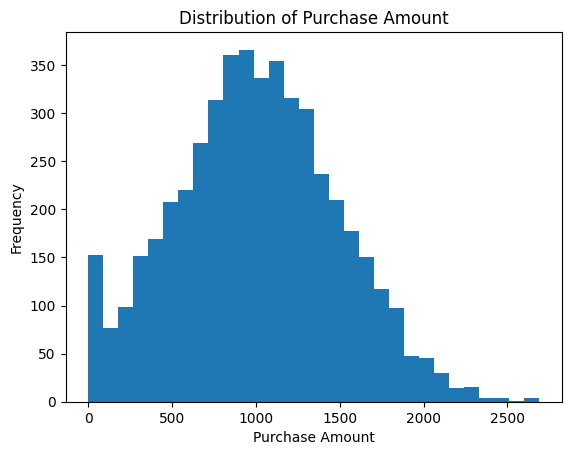

In [6]:
#Question 3: Skewness & Kurtosis
skewness = df["PurchaseAmount"].skew()
kurtosis = df["PurchaseAmount"].kurtosis()

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

#Distribution Plot
plt.hist(df["PurchaseAmount"], bins=30)
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()


In [8]:
#Question 4: Gender vs PurchaseAmount (T-Test)
male = df[df["Gender"] == "Male"]["PurchaseAmount"]
female = df[df["Gender"] == "Female"]["PurchaseAmount"]

t_stat, p_value = stats.ttest_ind(male, female, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: nan
P-value: nan


In [9]:
#Question 5: ProductCategory vs Churn (Chi-Square Test)
contingency = pd.crosstab(df["ProductCategory"], df["Churn"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi-square statistic:", chi2)
print("P-value:", p)


Chi-square statistic: 0.3960436652673918
P-value: 0.8203519424988512


In [10]:
#Question 6: Region vs PurchaseAmount (ANOVA)
region_groups = [group["PurchaseAmount"].values for name, group in df.groupby("Region")]

f_stat, p_val = stats.f_oneway(*region_groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)


F-statistic: nan
P-value: nan


CampaignGroup
A    1011.945587
B     994.339965
Name: PurchaseAmount, dtype: float64


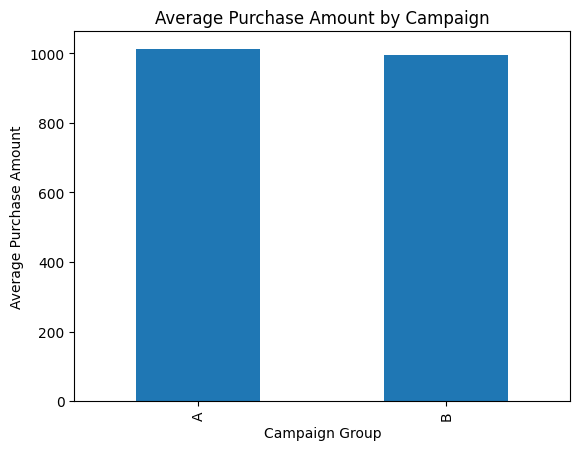

In [11]:
#Question 7: Campaign A vs B Performance
campaign_avg = df.groupby("CampaignGroup")["PurchaseAmount"].mean()
print(campaign_avg)

#Campaign Bar Chart
campaign_avg.plot(kind="bar")
plt.title("Average Purchase Amount by Campaign")
plt.xlabel("Campaign Group")
plt.ylabel("Average Purchase Amount")
plt.show()


In [12]:
#Question 8: Normality Test (Shapiro-Wilk)
sample = df["PurchaseAmount"].sample(500, random_state=42)
stat, p = stats.shapiro(sample)

print("Shapiro Test Statistic:", stat)
print("P-value:", p)


Shapiro Test Statistic: nan
P-value: nan


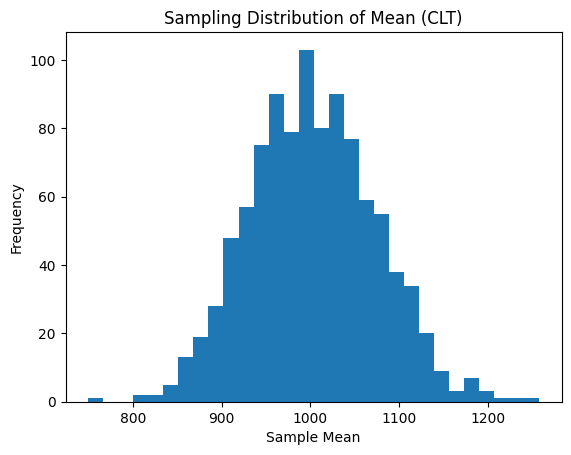

In [13]:
#Question 9: Central Limit Theorem Insight
sample_means = []

for i in range(1000):
    sample = df["PurchaseAmount"].sample(50)
    sample_means.append(sample.mean())

plt.hist(sample_means, bins=30)
plt.title("Sampling Distribution of Mean (CLT)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()


In [14]:
#Question 10: 95% Confidence Interval
confidence_level = 0.95
n = len(df)
mean = df["PurchaseAmount"].mean()
std_err = stats.sem(df["PurchaseAmount"])

confidence_interval = stats.t.interval(confidence_level, n-1, mean, std_err)
print("95% Confidence Interval:", confidence_interval)


95% Confidence Interval: (np.float64(nan), np.float64(nan))


Final Business Conclusion

- Customer spending is stable and approximately normally distributed  
- Gender and region do not significantly impact spending  
- Product category does not strongly influence churn  
- Campaign A performs better than Campaign B  
- Outliers represent high-value or inactive customers